## Plot SS Bouncepoints

In [1]:
import pandas as pd
df = pd.read_csv('ssbpts.csv')

df2 = df.query('MidLat > 30 and MidLat < 75 and MidLon < -60 and MidLon > -135 ')

df2

,Event,Network,Station,Range,Azimuth,BAzimuth,EvtLat,EvtLon,StaLat,StaLon,MidLat,MidLon
2197,C201401040011A,DK,NOR,105.470892,7.096068,232.160858,-20.60,-70.98,81.604700,-16.660900,31.750171,-64.340866
2300,C201401040011A,IC,BJT,159.736320,344.338394,19.246742,-20.60,-70.98,40.018300,116.167900,55.624719,-99.057802
2301,C201401040011A,IC,ENH,170.380568,357.668766,2.525836,-20.60,-70.98,30.276199,109.494400,64.487396,-76.379985
2302,C201401040011A,IC,HIA,150.166844,346.014830,20.253619,-20.60,-70.98,49.270401,119.741402,51.918674,-93.228413
2305,C201401040011A,IC,MDJ,150.680225,329.587319,41.673254,-20.60,-70.98,44.617630,129.593410,43.783458,-113.695166
2307,C201401040011A,IC,SSE,165.015797,316.987739,48.186975,-20.60,-70.98,31.094801,121.190804,39.252138,-131.835765
2309,C201401040011A,IC,XAN,166.641706,0.333699,359.623323,-20.60,-70.98,34.031300,108.923700,62.718882,-70.256893
2312,C201401040011A,II,ALE,103.074093,1.156406,188.301250,-20.60,-70.98,82.503300,-62.350000,30.927075,-69.924458
2321,C201401040011A,II,ERM,144.340576,314.628158,63.593956,-20.60,-70.98,42.015000,143.157200,31.216357,-123.371254
2342,C201401040011A,II,TLY,148.714667,6.366682,350.378855,-20.60,-70.98,51.680700,103.643800,53.221971,-60.706065


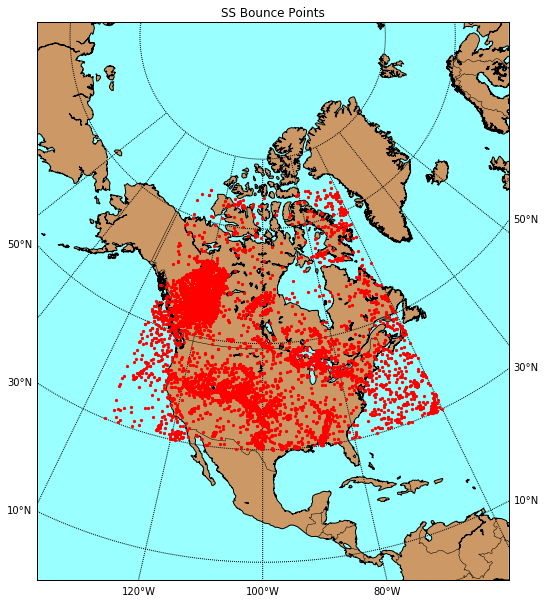

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-135.,llcrnrlat=0.,urcrnrlon=45.,urcrnrlat=61.,
            projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
            resolution ='l',area_thresh=1000.)
# read shapefile.
#shp_info = m.readshapefile('../../../examples/huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []

plt.figure(1,figsize=(10,10))

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

x, y = m( np.array(df2['MidLon']), np.array(df2['MidLat']) )

m.scatter(x, y,marker = '.', color='red', zorder = 10000)

plt.title('SS Bounce Points')
plt.savefig('bpts_NA.eps')
plt.show()

In [3]:
!open bpts*